# **CRICKET SHOT PREDICTION**

Cricket is a widely popular sport with numerous shots and playing techniques. Analyzing a cricket player's performance requires expert judgment to classify shots accurately. In this project, we will leverage the power of Convolutional Neural Networks (CNNs) to automate the classification of cricket shots, providing an efficient tool for coaches, players, and analysts.

In [2]:
#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
import random
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_path='/content/drive/MyDrive/cricket_shots/Train_data'
test_path='/content/drive/MyDrive/cricket_shots/Test_data'

In [4]:
folders=os.listdir(train_path)
folders

['drive', 'pullshot', 'sweep', 'flick']

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


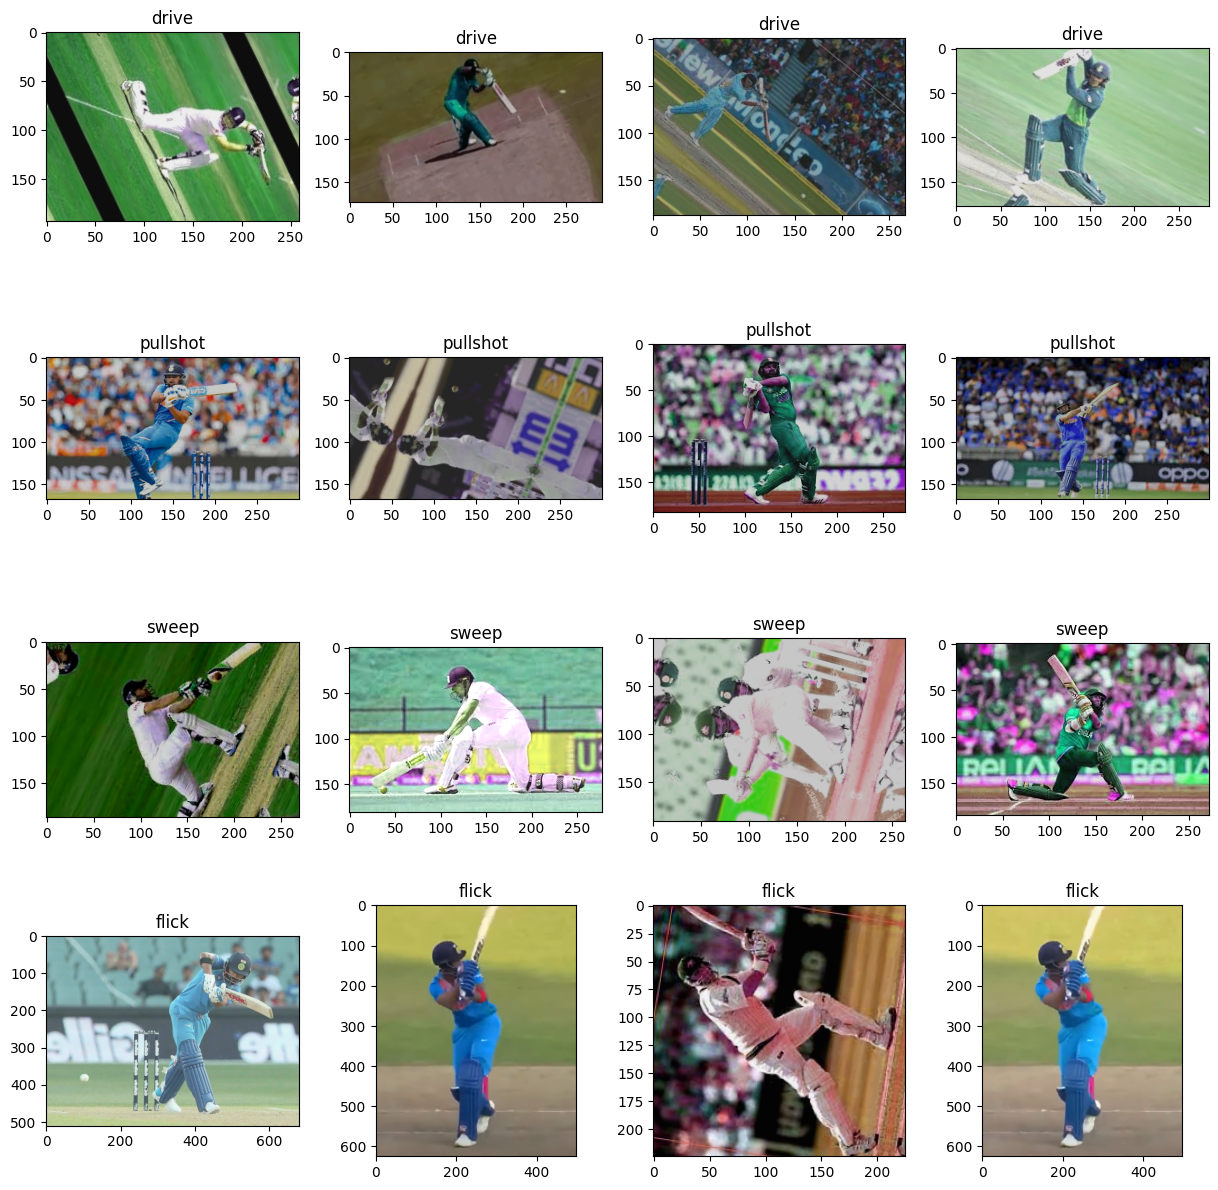

In [6]:
#Create subplots with 4 rows and 4 columns
fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(15,15))

#Display 4 images for each shot for each folder
for i in range(len(folders)):
  names_path=os.path.join(train_path,folders[i])
  names=os.listdir(names_path)
  # randomly select 4 image names
  names=random.sample(names,4)

  for j in range(len(names)):
    #read the image
    image=cv2.imread(names_path+'/'+names[j])
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    # display image
    ax[i,j].imshow(image)

    # set folder name as title
    ax[i,j].set_title(folders[i])
    # ax[i,j].axis('off')



In [7]:
#The dataset is already augumented
train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen= ImageDataGenerator(rescale=1/255)
training_set=train_datagen.flow_from_directory(train_path,target_size=(200,200),class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_path,target_size=(200,200),class_mode='categorical')

Found 4534 images belonging to 4 classes.
Found 199 images belonging to 4 classes.


In [9]:

model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4,activation='softmax'))


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 128)      

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(training_set,epochs=10,validation_data=test_set)

Epoch 1/10
142/142 [==============================] - 1587s 11s/step - loss: 1.3280 - accuracy: 0.3644 - val_loss: 1.4152 - val_accuracy: 0.3467
Epoch 2/10
142/142 [==============================] - 40s 281ms/step - loss: 1.0122 - accuracy: 0.5860 - val_loss: 0.8188 - val_accuracy: 0.7035
Epoch 3/10
142/142 [==============================] - 40s 280ms/step - loss: 0.7347 - accuracy: 0.7097 - val_loss: 0.5914 - val_accuracy: 0.7990
Epoch 4/10
142/142 [==============================] - 39s 271ms/step - loss: 0.5264 - accuracy: 0.8081 - val_loss: 0.5924 - val_accuracy: 0.7789
Epoch 5/10
142/142 [==============================] - 40s 278ms/step - loss: 0.3492 - accuracy: 0.8745 - val_loss: 0.4065 - val_accuracy: 0.8543
Epoch 6/10
142/142 [==============================] - 39s 276ms/step - loss: 0.2594 - accuracy: 0.9096 - val_loss: 0.3029 - val_accuracy: 0.8744
Epoch 7/10
142/142 [==============================] - 39s 274ms/step - loss: 0.2148 - accuracy: 0.9259 - val_loss: 0.5389 - val_ac

In [13]:
acc_score=model.evaluate(test_set)

7/7 [==============================] - 1s 198ms/step - loss: 0.3328 - accuracy: 0.9146


In [14]:
# model.save('shot_model.h5')

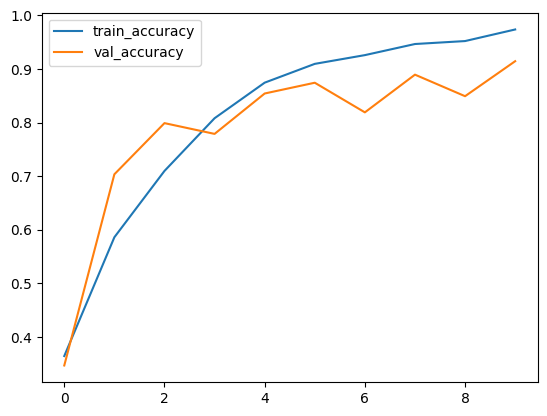

In [15]:
#Display the accuracy
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

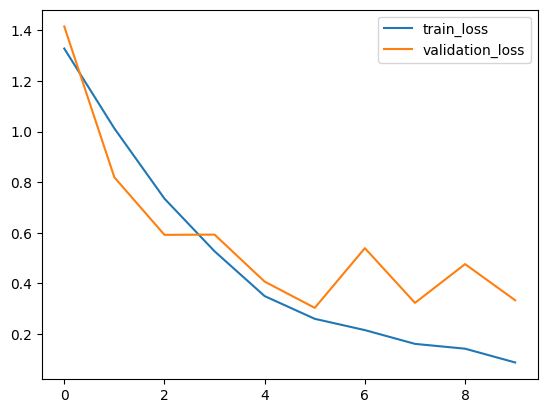

In [16]:
#Display the loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()

In [17]:
def predict_new(imgpath,model):
  image=cv2.imread(imgpath)
  cv2_imshow(image)
  image_resized=cv2.resize(image,(200,200))
  image=image_resized.reshape(1,200,200,3)

  pred=model.predict(image)
  x=np.argmax(pred)
  if x==0:
    print('drive')
  elif x==1:
    print('flick')
  elif x==2:
    print('sweep')
  else:
    print('pullshot')

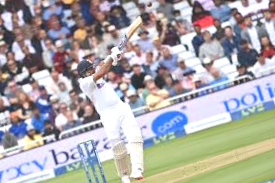

1/1 [==============================] - 0s 19ms/step
pullshot


In [20]:
predict_new('/content/drive/MyDrive/cricket_shots/Train_data/pullshot/pullshot1010.png',model)

# Conclusion
A Cricket Shot Classifier using CNNs can revolutionize cricket analysis by automating the shot classification process. This project not only serves as a valuable tool for coaches and players but also showcases the potential of deep learning in sports analytics.